In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import pickle
import itertools

In [3]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [4]:
def pick_covid_result1(covid):
    return [item[0] for item in covid]
def pick_covid_result2(covid):
    return [item[1] for item in covid]
def pick_covid_result3(covid):
    return [item[2] for item in covid]
def pick_covid_result4(covid):
    return [item[3] for item in covid]

def pick_cell_result1(cell):
    return [item[0] for item in cell]
def pick_cell_result2(cell):
    return [item[1] for item in cell]
def pick_cell_result3(cell):
    return [item[2] for item in cell]

In [5]:
'''
Regarding the detail codes for generating the pickle objects which store the information,
plese refer to /src/CNN_aaindex.py line 503-789
'''

with open('../data/benchmark/aaindex_paratope/holding_ML_real.p','rb') as f:
    ap_ML = pickle.load(f)
with open('../data/benchmark/onehot_paratope/holding_ML_real_onehot.p','rb') as f:
    op_ML = pickle.load(f)
with open('../data/benchmark/aaindex_pseudo/holding_ML_real_aa_pseudo.p','rb') as f:
    aps_ML = pickle.load(f)

with open('../data/benchmark/aaindex_paratope/holding_CNN.p','rb') as f:
    ap_CNN = pickle.load(f)
with open('../data/benchmark/onehot_paratope/holding_CNN_onehot.p','rb') as f:
    op_CNN = pickle.load(f)
with open('../data/benchmark/aaindex_pseudo/holding_CNN_aa_pseudo.p','rb') as f:
    aps_CNN = pickle.load(f)

with open('../data/benchmark/aaindex_paratope/holding_reslike.p','rb') as f:
    ap_res = pickle.load(f)
with open('../data/benchmark/onehot_paratope/holding_reslike_onehot.p','rb') as f:
    op_res = pickle.load(f)
with open('../data/benchmark/aaindex_pseudo/holding_reslike_aa_pseudo.p','rb') as f:
    aps_res = pickle.load(f)

In [6]:
ap = np.linspace(1,33,9).astype(np.int)
op = np.linspace(2,34,9).astype(np.int)
aps = np.linspace(3,35,9).astype(np.int)

In [7]:
def get_positions(inp):
    return list(itertools.chain.from_iterable(itertools.repeat(x,10) for x in inp))

In [8]:
def main_plot_ML(ax,model,s=3):

    #ax.set_title(model,fontsize=13)
    ph = ap_ML[model]
    ax.scatter(x=get_positions(ap[0:7]),y=ph['validation'] + ph['dengue'] + pick_cell_result1(ph['cell']) +
                                    pick_covid_result1(ph['covid']) + pick_covid_result2(ph['covid']) +
                                    pick_covid_result3(ph['covid']) + pick_covid_result4(ph['covid']),c='k',s=s)
    ph = op_ML[model]
    ax.scatter(x=get_positions(op[0:7]),y=ph['validation'] + ph['dengue'] + pick_cell_result1(ph['cell']) +
                                    pick_covid_result1(ph['covid']) + pick_covid_result2(ph['covid']) +
                                    pick_covid_result3(ph['covid']) + pick_covid_result4(ph['covid']),c='r',s=s)
    ph = aps_ML[model]
    ax.scatter(x=get_positions(aps[0:7]),y=ph['validation'] + ph['dengue'] + pick_cell_result1(ph['cell']) +
                                    pick_covid_result1(ph['covid']) + pick_covid_result2(ph['covid']) +
                                    pick_covid_result3(ph['covid']) + pick_covid_result4(ph['covid']),c='orange',s=s)
    ax1 = ax.twinx()
    ax1.set_ylim([0,12])
    ph = ap_ML[model]
    ax1.scatter(x=get_positions(ap[7:]),y=pick_cell_result2(ph['cell']) + pick_cell_result3(ph['cell']), c='k',s=s)
    ph = op_ML[model]
    ax1.scatter(x=get_positions(op[7:]),y=pick_cell_result2(ph['cell']) + pick_cell_result3(ph['cell']), c='r',s=s)
    ph = aps_ML[model]
    ax1.scatter(x=get_positions(aps[7:]),y=pick_cell_result2(ph['cell']) + pick_cell_result3(ph['cell']), c='orange',s=s)

    ax.set_xticks(np.linspace(2,34,9).astype(np.int))
    ax.set_xticklabels(['validation','dengue','neoantigen_R','con-R','un-R','con-P','un-P','top20','top50'],rotation=60,
                       fontsize=4)
    ax.tick_params(axis='y',labelsize=2)
    ax1.tick_params(axis='y',labelsize=2)

In [9]:
def main_plot_CNN(ax,s=3):

    #ax.set_title('CNN',fontsize=13)
    ph = ap_CNN
    ax.scatter(x=get_positions(ap[0:7]),y=ph['validation'] + ph['dengue'] + pick_cell_result1(ph['cell']) +
                                    pick_covid_result1(ph['covid']) + pick_covid_result2(ph['covid']) +
                                    pick_covid_result3(ph['covid']) + pick_covid_result4(ph['covid']),c='k',s=s)
    ph = op_CNN
    ax.scatter(x=get_positions(op[0:7]),y=ph['validation'] + ph['dengue'] + pick_cell_result1(ph['cell']) +
                                    pick_covid_result1(ph['covid']) + pick_covid_result2(ph['covid']) +
                                    pick_covid_result3(ph['covid']) + pick_covid_result4(ph['covid']),c='r',s=s)
    ph = aps_CNN
    ax.scatter(x=get_positions(aps[0:7]),y=ph['validation'] + ph['dengue'] + pick_cell_result1(ph['cell']) +
                                    pick_covid_result1(ph['covid']) + pick_covid_result2(ph['covid']) +
                                    pick_covid_result3(ph['covid']) + pick_covid_result4(ph['covid']),c='orange',s=s)
    ax1 = ax.twinx()
    ax1.set_ylim([0,12])
    ph = ap_CNN
    ax1.scatter(x=get_positions(ap[7:]),y=pick_cell_result2(ph['cell']) + pick_cell_result3(ph['cell']), c='k',s=s)
    ph = op_CNN
    ax1.scatter(x=get_positions(op[7:]),y=pick_cell_result2(ph['cell']) + pick_cell_result3(ph['cell']), c='r',s=s)
    ph = aps_CNN
    ax1.scatter(x=get_positions(aps[7:]),y=pick_cell_result2(ph['cell']) + pick_cell_result3(ph['cell']), c='orange',s=s)

    ax.set_xticks(np.linspace(2,34,9).astype(np.int))
    ax.set_xticklabels(['validation','dengue','neoantigen_R','con-R','un-R','con-P','un-P','top20','top50'],rotation=60,
                       fontsize=4)
    ax.tick_params(axis='y',labelsize=2)
    ax1.tick_params(axis='y',labelsize=2)

In [10]:
def main_plot_reslike(ax,s=3):

    #ax.set_title('ResLike',fontsize=13)
    ph = ap_res
    ax.scatter(x=get_positions(ap[0:7]),y=ph['validation'] + ph['dengue'] + pick_cell_result1(ph['cell']) +
                                    pick_covid_result1(ph['covid']) + pick_covid_result2(ph['covid']) +
                                    pick_covid_result3(ph['covid']) + pick_covid_result4(ph['covid']),c='k',s=s)
    ph = op_res
    ax.scatter(x=get_positions(op[0:7]),y=ph['validation'] + ph['dengue'] + pick_cell_result1(ph['cell']) +
                                    pick_covid_result1(ph['covid']) + pick_covid_result2(ph['covid']) +
                                    pick_covid_result3(ph['covid']) + pick_covid_result4(ph['covid']),c='r',s=s)
    ph = aps_res
    ax.scatter(x=get_positions(aps[0:7]),y=ph['validation'] + ph['dengue'] + pick_cell_result1(ph['cell']) +
                                    pick_covid_result1(ph['covid']) + pick_covid_result2(ph['covid']) +
                                    pick_covid_result3(ph['covid']) + pick_covid_result4(ph['covid']),c='orange',s=s)
    ax1 = ax.twinx()
    ax1.set_ylim([0,12])
    ph = ap_res
    ax1.scatter(x=get_positions(ap[7:]),y=pick_cell_result2(ph['cell']) + pick_cell_result3(ph['cell']), c='k',s=s)
    ph = op_res
    ax1.scatter(x=get_positions(op[7:]),y=pick_cell_result2(ph['cell']) + pick_cell_result3(ph['cell']), c='r',s=s)
    ph = aps_res
    ax1.scatter(x=get_positions(aps[7:]),y=pick_cell_result2(ph['cell']) + pick_cell_result3(ph['cell']), c='orange',s=s)

    ax.set_xticks(np.linspace(2,34,9).astype(np.int))
    ax.set_xticklabels(['validation','dengue','neoantigen_R','con-R','un-R','con-P','un-P','top20','top50'],rotation=60,
                       fontsize=4)
    ax.tick_params(axis='y',labelsize=2)
    ax1.tick_params(axis='y',labelsize=2)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

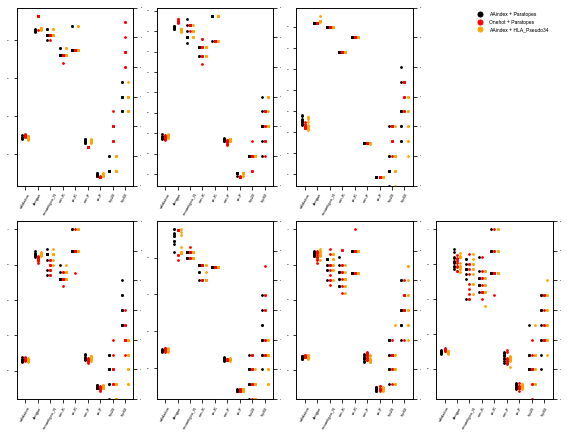

In [13]:
fig,ax = plt.subplots(2,4,figsize=(9.6,7.2))
main_plot_ML(ax[0,0],'elasticnet')
main_plot_ML(ax[0,1],'KNN')
main_plot_ML(ax[0,2],'SVR')
main_plot_ML(ax[1,0],'randomforest')
main_plot_ML(ax[1,1],'adaboost')

main_plot_CNN(ax[1,2])
main_plot_reslike(ax[1,3])


h2 = [ax[0,3].plot([],[],color=i,marker='o',ls='',markersize=5)[0] for i in ['black','red','orange']]
ax[0,3].legend(handles=h2,labels=['AAindex + Paratopes', 'Onehot + Paratopes', 'AAindex + HLA_Pseudo34'],frameon=False,fontsize=5)
ax[0,3].axis('off')